<div style="line-height:0.45">
<h1 style="color:#0AE42F  ">  K-means method 2 </h1>
</div>
<div style="line-height:0.4">
<h4> 5 solutions for K-Means with sklearn on the mushroom dataset.
</h4>
<h3 style="color:lightblue"> Keywords: </h3> DBSCAN, AgglomerativeClustering
</div>

In [101]:
import sys
import seaborn
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import classification_report

from sklearn.cluster import DBSCAN, AgglomerativeClustering

from sklearn.decomposition import PCA


In [69]:
from sklearn import __version__
print(__version__)

1.3.0


<h3 style="color:#0AE42F  ">  Simple Classification with Knn </h3>

In [70]:
mush = pd.read_csv('./data_to_use/mushrooms.csv')
mush.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [71]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   type                      8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [72]:
mush.dtypes

type                        object
cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object

In [73]:
# Check null data
mush.isnull().sum()

type                        0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

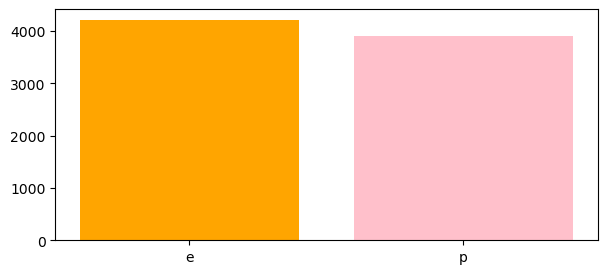

In [74]:
# Plotting class in bars
plt.figure(figsize=(7, 3))
plt.bar(mush['type'].value_counts().index, mush['type'].value_counts().values,color=['orange', 'pink'])
plt.show()

In [75]:
""" Data manipulation """
df = mush.copy()        #better use a copy
Lb = LabelEncoder()     #since data has ordinal attributes

## Encode all the attributes (including the y labels)
for features in df.columns:
    df[features] = Lb.fit_transform(df[features])
df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


<Axes: xlabel='type'>

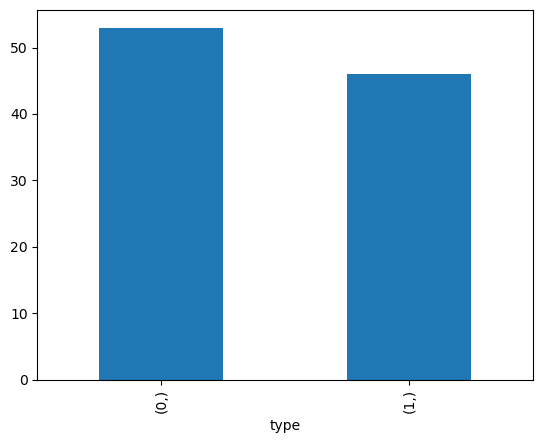

In [76]:
# Plot with pandas
df[-100:-1][['type']].value_counts().plot(kind='bar')

In [77]:
""" Training """
X = df.drop(columns=['type'],axis=1)[:-100]    #training vars
Y = df['type'][:-100]                          #training classes
x = df.drop(columns=['type'], axis=1)[-100:]   #100 samples
y = df['type'][-100:] 

### => 2-Fold cross-validation

X_before was:    cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   
5          5            3          9        1     0                1   
6          0            2          8        1     0                1   
7          0            3          8        1     3                1   
8          5            3          8        1     6                1   
9          0            2          9        1     0                1   

   gill_spacing  gill_size  gill_color  stalk_shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2            

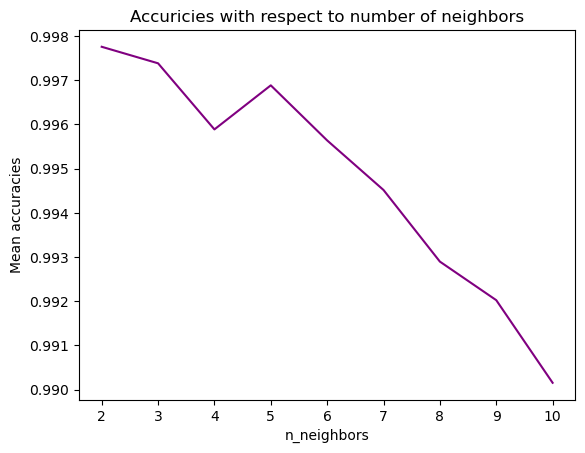

In [78]:
""" Common issue in cross-validation: 
c_contiguous attribute is missing from a Flags object. 
It is a requirement for cross_val_score method: The c_contiguous attribute is used to check if an array is stored in C-contiguous order (row-major order), 
Avoid error converting the X array to C-contiguous order using ascontiguousarray() [X = np array]
"""
kfold = KFold(n_splits=2, random_state=42, shuffle=True)
train_scores = []

### Convert X to C-contiguous order
print(f"X_before was: {X[:10]}")
X = np.ascontiguousarray(X)
print(f"X final is : {X[:10]}")

### Create the classifiers and score them
for i in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_result = cross_val_score(knn, X, Y, cv=kfold, scoring="accuracy")
    train_scores.append(cv_result.mean())
knn_models_performances = pd.DataFrame({'Mean_training_scores':train_scores},index=range(2,11)) 

###### Display training scores
plt.plot(knn_models_performances.Mean_training_scores, color='purple')
plt.ylabel('Mean accuracies')
plt.xlabel('n_neighbors')
plt.title('Accuricies with respect to number of neighbors')
plt.show()

In [79]:
training_score = []
testing_score = []
# Accuracy has the best result on 2 neighbors
knn = KNeighborsClassifier(n_neighbors=2)

######## Train the KNN on 2 neighbors
for train_index, test_index in kfold.split(X):
    print(train_index)
    X_train, X_test = X[train_index], X[test_index]     #iloc does not exist in numpy !
    Y_train, Y_test = Y[train_index], Y[test_index]
    knn.fit(X_train,Y_train)
    training_score.append(knn.score(X,Y))
    train_predictions = knn.predict(X_test)
    testing_score.append(accuracy_score(Y_test, train_predictions))

print()
print("training_score is: {training_score}".format(training_score=training_score))
print("testing_score is: {testing_score}".format(testing_score=testing_score))    

[   1    2    3 ... 8015 8020 8022]
[   0    8   12 ... 8019 8021 8023]

training_score is: [0.9982552342971087, 0.9992522432701895]
testing_score is: [0.9970089730807578, 0.9985044865403788]


x before was:       cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
8024          3            3          4        0     2                1   
8025          5            2          4        0     5                0   
8026          2            2          4        0     5                0   
8027          3            3          4        0     2                1   
8028          3            2          4        0     2                1   
8029          5            0          3        0     5                1   
8030          3            2          8        0     5                1   
8031          3            3          2        0     2                1   
8032          5            2          4        0     2                1   
8033          3            3          4        0     2                1   

      gill_spacing  gill_size  gill_color  stalk_shape  ...  \
8024             0          1           0            1  ...   
8025             0          0     

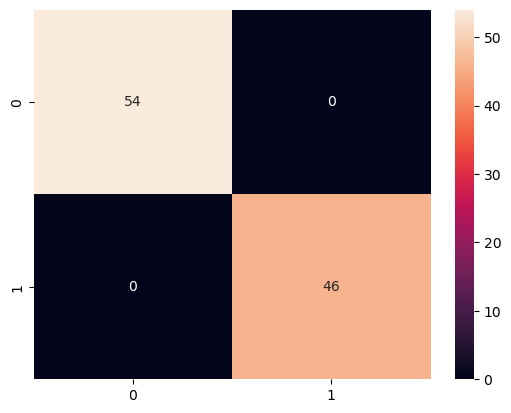

In [80]:
""" Validation """
### Convert X to C-contiguous order
print(f"x before was: {x[:10]}")
x = np.ascontiguousarray(x)
print(f"x final is : {x[:10]}")
print()

# Predict 
val_predictions = knn.predict(x)
# Get Variances and show the confusion_matrix  
cm = confusion_matrix(y, val_predictions)
seaborn.heatmap(cm, annot=True)
# Metrics
print(classification_report(y, val_predictions))

<h2 style="color:#0AE42F  "> 1) <u> K-means solution </u></h2>

[[ 187 3967]
 [1700 2170]]


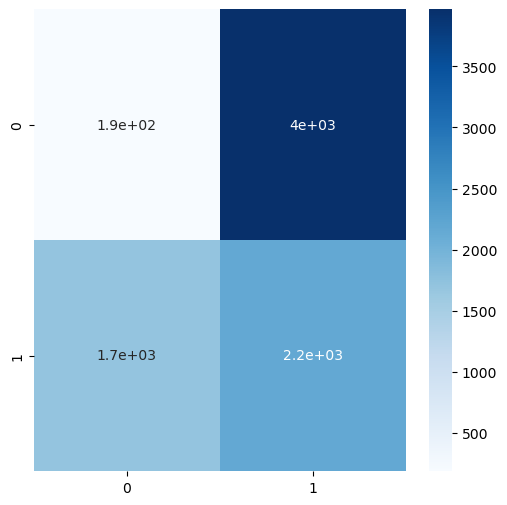

In [81]:
""" No need to split the data into folds, use training attributes 
    Params: 
        * k-means++ : selects initial cluster centroids using sampling based on an empirical probability distribution 
            of the points’ contribution to the overall inertia. 
            It speeds up convergence. The implemented algorithm  is “greedy k-means++”. 
            It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.
            The other options is random : 
                                choose n_clusters observations (rows) at random from data for the initial centroids.
        * n_jobs option has been deprecated after sklearn 0.24.2.. Now all cores are used by default. 
"""
#kmeans = KMeans(2, init='k-means++', n_init=100, n_jobs=-1) #n_jobs = -1 use all cpus
kmeans = KMeans(2, init='k-means++', n_init=100)

# Train ...no Y labels
kmeans.fit(X) 
# Calc the confusion matrix with trained labels + training classes 
cm_1 = confusion_matrix(Y, kmeans.labels_)

print(cm_1)

In [ ]:
## Plot
plt.figure(figsize=(6,6))
seaborn.heatmap(cm_1,annot=True, cmap='PuBu')
#plt.show()

In [82]:
# Classification report of training
print(classification_report(Y, kmeans.labels_))

              precision    recall  f1-score   support

           0       0.10      0.05      0.06      4154
           1       0.35      0.56      0.43      3870

    accuracy                           0.29      8024
   macro avg       0.23      0.30      0.25      8024
weighted avg       0.22      0.29      0.24      8024



[[ 5 49]
 [44  2]]


<Axes: >

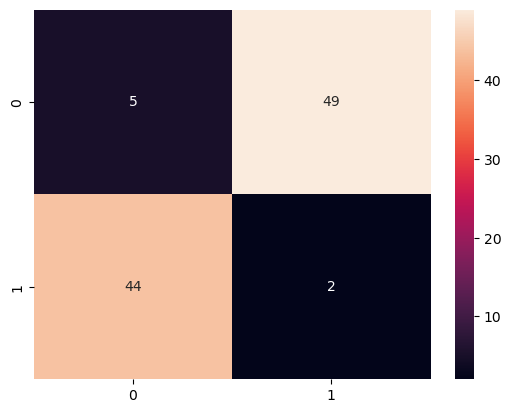

In [83]:
# Validation part
val_preds = kmeans.predict(x)
cm_2 = confusion_matrix(y, val_preds)
print(cm_2)

seaborn.heatmap(cm_2, annot=True)

In [84]:
# Validation results
print(classification_report(y, val_preds))

              precision    recall  f1-score   support

           0       0.10      0.09      0.10        54
           1       0.04      0.04      0.04        46

    accuracy                           0.07       100
   macro avg       0.07      0.07      0.07       100
weighted avg       0.07      0.07      0.07       100



<div style="line-height:0.62">
<h3 style="color:#0AE42F  "> => Conclusions </h3>
The K-means algorithm is not performing well on this dataset.   

Possible Adjustments:
</div>

+ Feature engineering ...Means create new features combining existing ones to better capture the underlying structure of the data.   
=> can be useful but not what I want now   
+ Scaling  => K-means is sensitive to the scale of the input features. If some features have much larger ranges than others, <br> 
they can dominate the clustering process.   
=> Is want I want! See the results.
+ Hyperparameters tuning   
+ Change clustering algorithm   
+ Perform dimensionality reduction    

<h2 style="color:#0AE42F  "> 2) <u> Scaling solution </u></h2>

[[ 187 3967]
 [1700 2170]]


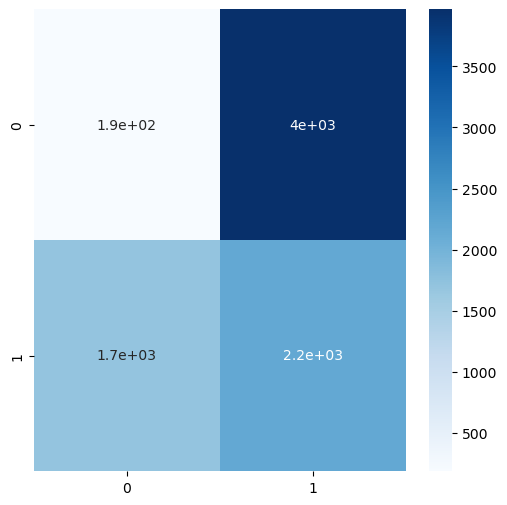

In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(2, init='k-means++', n_init=100)
# Train
kmeans.fit(X) 
cm_1 = confusion_matrix(Y, kmeans.labels_)
print(cm_1)
plt.figure(figsize=(6,6))
seaborn.heatmap(cm_1,annot=True, cmap='Blues')
plt.show()

In [86]:
# Classification report of training
print(classification_report(Y, kmeans.labels_))

              precision    recall  f1-score   support

           0       0.10      0.05      0.06      4154
           1       0.35      0.56      0.43      3870

    accuracy                           0.29      8024
   macro avg       0.23      0.30      0.25      8024
weighted avg       0.22      0.29      0.24      8024



[[ 5 49]
 [44  2]]


<Axes: >

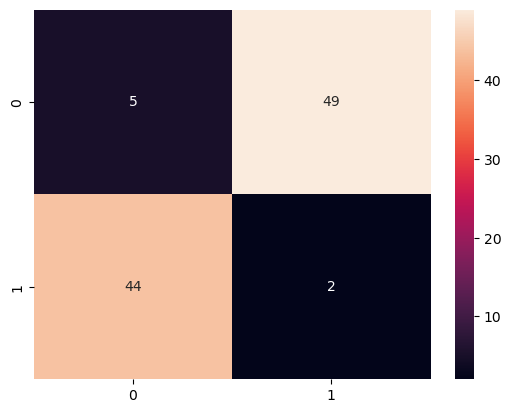

In [87]:
# Validation part
val_preds = kmeans.predict(x)
cm_2 = confusion_matrix(y,val_preds)
print(cm_2)

seaborn.heatmap(cm_2, annot=True)

In [88]:
# Validation results
print(classification_report(y, val_preds))

              precision    recall  f1-score   support

           0       0.10      0.09      0.10        54
           1       0.04      0.04      0.04        46

    accuracy                           0.07       100
   macro avg       0.07      0.07      0.07       100
weighted avg       0.07      0.07      0.07       100



### => Tuning hyperparameters

In [89]:
# Different values of k
for k in range(2, 10):
    kmeans = KMeans(k, init='k-means++', n_init=100)
    kmeans.fit(X_scaled)
    print(f"k={k}, inertia={kmeans.inertia_}")

# try different initialization methods
kmeans = KMeans(2, init='random', n_init=100)
kmeans.fit(X_scaled)
print(f"Inertia with random initialization: {kmeans.inertia_}")

kmeans = KMeans(2, init='k-means++', n_init=100)
kmeans.fit(X_scaled)
print(f"Inertia with k-means++ initialization: {kmeans.inertia_}")

k=2, inertia=142032.41964564382
k=3, inertia=124073.063839348
k=4, inertia=107879.31458723165
k=5, inertia=92420.76845975118
k=6, inertia=80353.82098090247
k=7, inertia=69470.68626651274
k=8, inertia=65680.27929786338
k=9, inertia=62418.70749402074
Inertia with random initialization: 142032.41964564382
Inertia with k-means++ initialization: 142032.41964564382


<h2 style="color:#0AE42F  "> 3) <u> Change clustering technique solution </u></h2>

In [90]:
""" Hierarchical clustering """
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical.fit(X_scaled)

AgglomerativeClustering()

[[4154    0]
 [2186 1684]]


<Axes: >

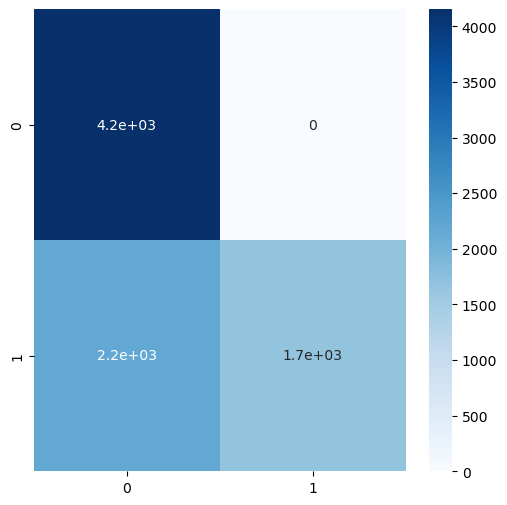

In [91]:
# Confusion matrix
cm = confusion_matrix(Y, hierarchical.labels_)
print(cm)
## Plot
plt.figure(figsize=(6,6))
seaborn.heatmap(cm, annot=True, cmap='YlGnBu')
#plt.show()

In [92]:
# Classification report
print(classification_report(Y, hierarchical.labels_))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79      4154
           1       1.00      0.44      0.61      3870

    accuracy                           0.73      8024
   macro avg       0.83      0.72      0.70      8024
weighted avg       0.82      0.73      0.70      8024



<div style="line-height:0.65">
<h3> DBSCAN </h3>
</div>
A density-based clustering algorithm that groups together points that are close to each other in high-density regions,    <br>
while marking points in low-density regions as noise.

    Parameters
    ----------
    eps : float, default=0.5
        The maximum distance between two samples for one to be considered
        as in the neighborhood of the other. This is not a maximum bound
        on the distances of points within a cluster. This is the most
        important DBSCAN parameter to choose appropriately for your data set
        and distance function.

    min_samples : int, default=5
        The number of samples (or total weight) in a neighborhood for a point
        to be considered as a core point. This includes the point itself.

    metric : str, or callable, default='euclidean'
        The metric to use when calculating distance between instances in a
        feature array. If metric is a string or callable, it must be one of
        the options allowed by :func:`sklearn.metrics.pairwise_distances` for
        its metric parameter.
        If metric is "precomputed", X is assumed to be a distance matrix and
        must be square. X may be a :term:`sparse graph`, in which
        case only "nonzero" elements may be considered neighbors for DBSCAN.

        .. versionadded:: 0.17
           metric *precomputed* to accept precomputed sparse matrix.

    metric_params : dict, default=None
        Additional keyword arguments for the metric function.

        .. versionadded:: 0.19

    algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'
        The algorithm to be used by the NearestNeighbors module
        to compute pointwise distances and find nearest neighbors.
        See NearestNeighbors module documentation for details.

    leaf_size : int, default=30
        Leaf size passed to BallTree or cKDTree. This can affect the speed
        of the construction and query, as well as the memory required
        to store the tree. The optimal value depends
        on the nature of the problem.

    p : float, default=None
        The power of the Minkowski metric to be used to calculate distance
        between points. If None, then ``p=2`` (equivalent to the Euclidean
        distance).

    n_jobs : int, default=None
        The number of parallel jobs to run.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

In [93]:
""" DBSCAN clustering (SLOW) """
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled); #dont show output

[[   0    0    0 ...    0    0    0]
 [2578    8    8 ...    6    6    6]
 [3870    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


<Axes: >

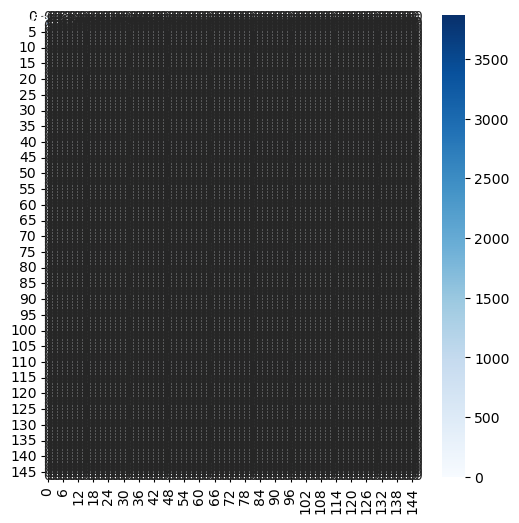

In [94]:
# Confusion matrix
cm = confusion_matrix(Y, dbscan.labels_)
#print(cm) #too long!

In [ ]:
""" DBSCAN does not assign all points to a cluster, it is not appropriate to use a confusion matrix to evaluate its performance. 
The confusion matrix assumes that each data point belongs to exactly one class, which is not the case for DBSCAN. 
To evaluate the quality of the DBSCAN clustering it is necessary to expoit other metrics, such as the silhouette score or the DB index.
"""
#plt.figure(figsize=(6,6))
#seaborn.heatmap(cm, annot=True, cmap='Reds')

In [111]:
# Silhouette score 
""" Silhouette score measures the similarity of each point to its own cluster compared to other clusters,   
and ranges from -1 to 1, with higher values indicating better clustering. 
The DB index measures the compactness and separation of the clusters, and lower values indicate better clustering.

Commented block: 
    To avoid the "ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)"
    ...check if DBSCAN has assigned more than one cluster before computing the scores.
"""
## Fit DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=25)
dbscan.fit(X)

# # Calc Silhouette score
# score = silhouette_score(X, dbscan.labels_)
# # Compute DB index
# score = davies_bouldin_score(X, dbscan.labels_)

# Check if DBSCAN assigned more than one cluster
if len(set(dbscan.labels_)) > 1:
    # Compute Silhouette score
    silhouette = silhouette_score(X, dbscan.labels_)
    # Compute DB index
    db_index = davies_bouldin_score(X, dbscan.labels_)
    print("Silhouette score:", silhouette)
    print("DB index:", db_index)
else:
    print("DBSCAN assigned only one cluster. Cannot compute Silhouette score or DB index.")

DBSCAN assigned only one cluster. Cannot compute Silhouette score or DB index.


If eps param is too large or min_samples is too low,    
DBSCAN may assign too many points to the same cluster, resulting in a clustering that is too coarse or granular.



If DBSCAN assigned only one cluster, it means that all points are considered as noise or belong to the same cluster     
based on the chosen parameters eps and min_samples. This can happen if the data is too sparse or noisy,   
or if the parameter values are not appropriate for the data.
--> increase min_samples or decrease esp!



<div style="line-height:0.45">
<h1 style="color:#0AE42F  ">  5) <u> PCA solution </u> </h1>
</div>
Feature extraction

In [96]:
## Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-0.5680522 , -1.0181292 ],
       [-2.27275178,  0.23689489],
       [-1.84584035, -0.30955972],
       ...,
       [ 3.51264583, -0.75548067],
       [ 3.98946419, -0.36103844],
       [ 3.80284877, -0.96308231]])

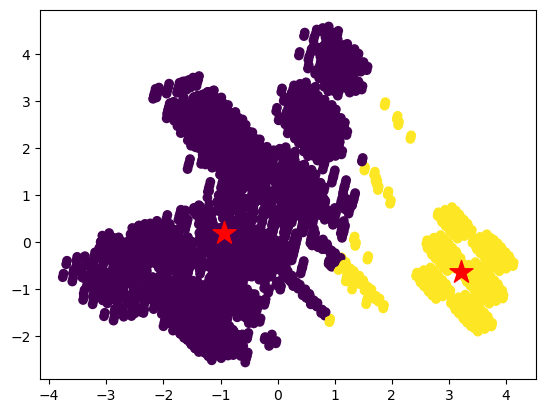

In [97]:
""" Perform KMeans on transformed data 
Pass n_init=10 to KMeans to suppress the FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. """
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X_pca)

# Plot results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='r')
plt.show()

[[4034  120]
 [2166 1704]]


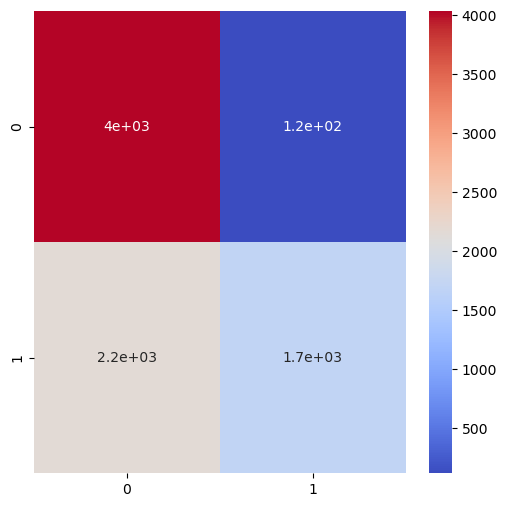

In [102]:
# Compute confusion matrix
cm = confusion_matrix(Y, kmeans.labels_)
print(cm)

# Display confusion matrix
plt.figure(figsize=(6,6))
seaborn.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

In [99]:
# Compute classification report
print(classification_report(Y, kmeans.labels_))

              precision    recall  f1-score   support

           0       0.65      0.97      0.78      4154
           1       0.93      0.44      0.60      3870

    accuracy                           0.72      8024
   macro avg       0.79      0.71      0.69      8024
weighted avg       0.79      0.72      0.69      8024

